In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('customer.csv')
df.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


## 정제

In [3]:
df.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

### customer_id

In [5]:
df['customer_id'].sort_values()

10919         1
42099         2
29119         3
78327         4
18836         5
          ...  
94443     99996
54318     99997
56085     99998
47676     99999
9239     100000
Name: customer_id, Length: 100000, dtype: int64

In [6]:
# 회원번호 : 1~100000 까지 총 100,000명의 고객 존재

### name

이름은 이탈률과 관계가 없다고 판단 → 컬럼 삭제

In [7]:
df = df.drop(['first_name', 'last_name', 'username'], axis=1)
df.head()

,customer_id,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


### email

이메일 또한 이탈률과 관계가 없다고 판단 → 컬럼 삭제

In [8]:
df = df.drop(['email'], axis=1)
df.head()

,customer_id,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


### gender

In [9]:
df['gender'].value_counts(normalize=True)

gender
F    0.6423
M    0.3577
Name: proportion, dtype: float64

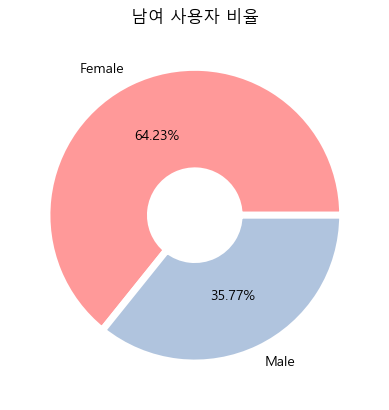

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'
colors = ['#ff9999', 'lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df['gender'].value_counts(normalize=True), labels=['Female', 'Male'], autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)
plt.title('남여 사용자 비율')
plt.show()

In [11]:
# 여성유저가 두 배가량 많음

### birthdate

In [12]:
# 나이 컬럼 생성

def age(birthdate):
    age = 2023 - int(birthdate[0:4]) + 1
    return age

df['age'] = df['birthdate'].apply(age)
df.head()

,customer_id,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,28
1,8193,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,31
2,7279,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,35
3,88813,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,33
4,82542,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,24


<Axes: xlabel='age'>

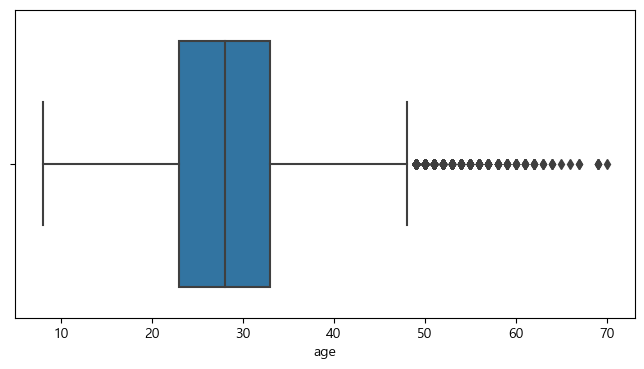

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='age')

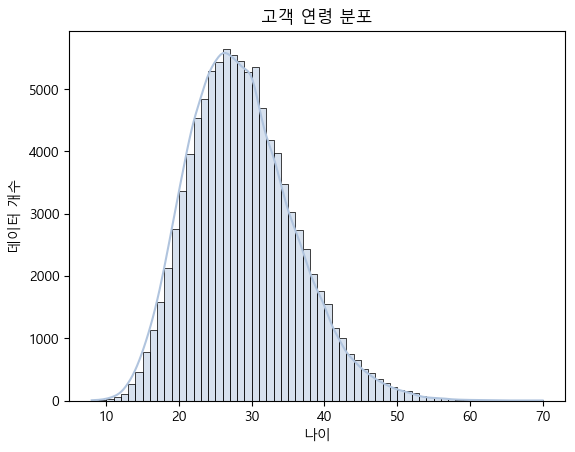

In [14]:
# 나이에 따른 히스토그램 (사용자 분포 확인)
sns.histplot(data=df, x='age', bins=len(df['age'].unique()), color='lightsteelblue', kde=True)
plt.xlabel('나이')
plt.ylabel('데이터 개수')
plt.title('고객 연령 분포')
plt.show()

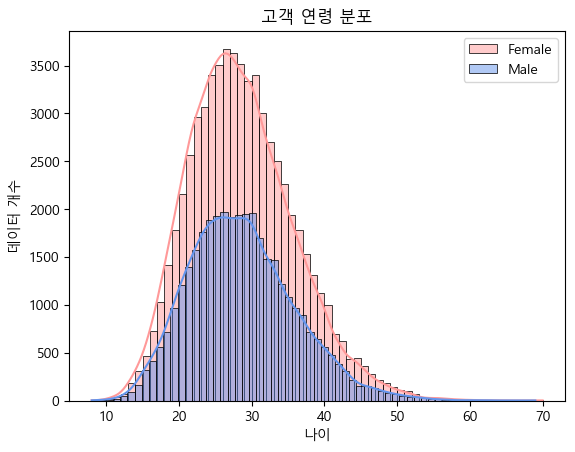

In [15]:
# 성별/나이에 따른 히스토그램 (사용자 분포 확인)
df_female = df.query('gender == "F"')
df_male = df.query('gender == "M"')

sns.histplot(data=df_female, x='age', bins=len(df['age'].unique()), color='#ff9999', kde=True, label='Female')
sns.histplot(data=df_male, x='age', bins=len(df['age'].unique()), color='cornflowerblue', kde=True, label='Male')
plt.xlabel('나이')
plt.ylabel('데이터 개수')
plt.title('고객 연령 분포')
plt.legend()
plt.show()

In [16]:
print(f"나이 백분위 1% : {int(np.percentile(df['age'], 1))}세")
print(f"나이 백분위 90% : {int(np.percentile(df['age'], 90))}세")

나이 백분위 1% : 15세
나이 백분위 90% : 38세


### device_type

In [17]:
df['device_type'].value_counts(normalize=True)

device_type
Android    0.76637
iOS        0.23363
Name: proportion, dtype: float64

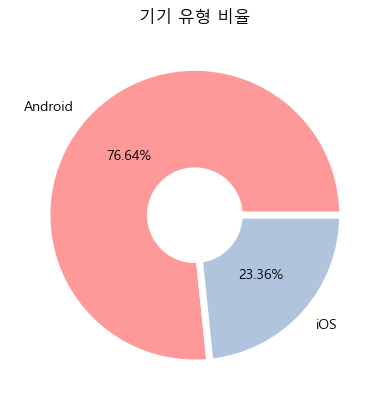

In [18]:
colors = ['#ff9999', 'lightsteelblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df['device_type'].value_counts(normalize=True), labels=['Android', 'iOS'], autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)
plt.title('기기 유형 비율')
plt.show()

In [19]:
# 안드로이드가 ios보다 3배 정도 많음

### device_id

고유값으로, 고객 이탈과 관계없는 컬럼이므로 삭제

In [20]:
df = df.drop(['device_id'], axis=1)
df.head()

,customer_id,gender,birthdate,device_type,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,F,1996-06-14,iOS,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,28
1,8193,F,1993-08-16,Android,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,31
2,7279,M,1989-01-23,iOS,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,35
3,88813,M,1991-01-05,iOS,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,33
4,82542,M,2000-07-15,iOS,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,24


### device_version

In [21]:
df['device_version'].value_counts()

device_version
Android 2.2.2                                 1296
Android 4.4                                   1294
Android 4.0.4                                 1291
Android 4.3                                   1285
Android 3.0                                   1278
                                              ... 
iPad; CPU iPad OS 14_2 like Mac OS X           949
iPhone; CPU iPhone OS 10_3_4 like Mac OS X     948
iPad; CPU iPad OS 3_1_3 like Mac OS X          933
iPhone; CPU iPhone OS 9_3_5 like Mac OS X      907
iPhone; CPU iPhone OS 6_1_6 like Mac OS X      902
Name: count, Length: 86, dtype: int64

In [22]:
def device_version_split_1(device_version):
    if device_version[:6] == 'iPhone':
        return 'iPhone'
    elif device_version[:4] == 'iPad':
        return 'iPad'
    elif device_version[:7] == 'Android':
        return 'Android'
    else:
        return np.nan

def device_version_split_2(device_version):
    if device_version[:6] == 'iPhone':
        return device_version[22:-14].replace('_', '.')
    elif device_version[:4] == 'iPad':
        return device_version[18:-14].replace('_', '.')
    elif device_version[:7] == 'Android':
        return device_version[8:]
    else:
        return np.nan

df['device'] = df['device_version'].apply(device_version_split_1)
df['device_version'] = df['device_version'].apply(device_version_split_2)
df.head()

,customer_id,gender,birthdate,device_type,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age,device
0,2870,F,1996-06-14,iOS,14.2.1,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,28,iPhone
1,8193,F,1993-08-16,Android,2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,31,Android
2,7279,M,1989-01-23,iOS,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,35,iPad
3,88813,M,1991-01-05,iOS,14.2,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,33,iPad
4,82542,M,2000-07-15,iOS,10.3.3,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,24,iPhone


device_version으로 얻을 수 있는 인사이트가 있을까 싶어서 정제

In [23]:
def device_version_split_3(device_version):
    version = device_version.split('.')[0]
    return int(version)

df['device_version2'] = df['device_version'].apply(device_version_split_3)
df.head()

,customer_id,gender,birthdate,device_type,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age,device,device_version2
0,2870,F,1996-06-14,iOS,14.2.1,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,28,iPhone,14
1,8193,F,1993-08-16,Android,2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,31,Android,2
2,7279,M,1989-01-23,iOS,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,35,iPad,4
3,88813,M,1991-01-05,iOS,14.2,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,33,iPad,14
4,82542,M,2000-07-15,iOS,10.3.3,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,24,iPhone,10


In [24]:
df.query('device == "iPhone"')['device_type'].value_counts()

device_type
iOS    11630
Name: count, dtype: int64

In [25]:
df.query('device == "iPad"')['device_type'].value_counts()

device_type
iOS    11733
Name: count, dtype: int64

In [26]:
df.query('device == "Android"')['device_type'].value_counts()

device_type
Android    76637
Name: count, dtype: int64

device로 device_type 확인 가능 → device_type 컬럼 삭제

In [27]:
df = df.drop(['device_type'], axis=1)
df.head()

,customer_id,gender,birthdate,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age,device,device_version2
0,2870,F,1996-06-14,14.2.1,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,28,iPhone,14
1,8193,F,1993-08-16,2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,31,Android,2
2,7279,M,1989-01-23,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,35,iPad,4
3,88813,M,1991-01-05,14.2,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,33,iPad,14
4,82542,M,2000-07-15,10.3.3,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,24,iPhone,10


### home_location_lat & home_location_long

In [28]:
df.rename(columns={'home_location_lat':'home_lat', 'home_location_long':'home_long'}, inplace=True)
df.head()

,customer_id,gender,birthdate,device_version,home_lat,home_long,home_location,home_country,first_join_date,age,device,device_version2
0,2870,F,1996-06-14,14.2.1,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,28,iPhone,14
1,8193,F,1993-08-16,2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,31,Android,2
2,7279,M,1989-01-23,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,35,iPad,4
3,88813,M,1991-01-05,14.2,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,33,iPad,14
4,82542,M,2000-07-15,10.3.3,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,24,iPhone,10


### home_location

In [29]:
df['home_location'].unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [30]:
len(df['home_location'].unique())

33

### home_country

In [31]:
df['home_country'].value_counts()

home_country
Indonesia    100000
Name: count, dtype: int64

모두 다 인도네시아로, 컬럼 삭제

In [32]:
df = df.drop(['home_country'], axis=1)
df.head()

,customer_id,gender,birthdate,device_version,home_lat,home_long,home_location,first_join_date,age,device,device_version2
0,2870,F,1996-06-14,14.2.1,-1.043345,101.360523,Sumatera Barat,2019-07-21,28,iPhone,14
1,8193,F,1993-08-16,2.2.1,-6.212489,106.818850,Jakarta Raya,2017-07-16,31,Android,2
2,7279,M,1989-01-23,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23,35,iPad,4
3,88813,M,1991-01-05,14.2,1.299332,115.774934,Kalimantan Timur,2021-10-03,33,iPad,14
4,82542,M,2000-07-15,10.3.3,-2.980807,114.924675,Kalimantan Selatan,2021-04-11,24,iPhone,10


### first_join_date

In [33]:
# first_join_age 컬럼 생성

def join_years_ago(first_join_date):
    join_years_ago = 2023 - int(first_join_date[0:4])
    return join_years_ago

df['join_years_ago'] = df['first_join_date'].apply(join_years_ago)
df.head()

,customer_id,gender,birthdate,device_version,home_lat,home_long,home_location,first_join_date,age,device,device_version2,join_years_ago
0,2870,F,1996-06-14,14.2.1,-1.043345,101.360523,Sumatera Barat,2019-07-21,28,iPhone,14,4
1,8193,F,1993-08-16,2.2.1,-6.212489,106.818850,Jakarta Raya,2017-07-16,31,Android,2,6
2,7279,M,1989-01-23,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23,35,iPad,4,3
3,88813,M,1991-01-05,14.2,1.299332,115.774934,Kalimantan Timur,2021-10-03,33,iPad,14,2
4,82542,M,2000-07-15,10.3.3,-2.980807,114.924675,Kalimantan Selatan,2021-04-11,24,iPhone,10,2


In [34]:
df['join_age'] = df['age'] - df['join_years_ago']
df = df.drop(['join_years_ago'], axis=1)
df.head()

,customer_id,gender,birthdate,device_version,home_lat,home_long,home_location,first_join_date,age,device,device_version2,join_age
0,2870,F,1996-06-14,14.2.1,-1.043345,101.360523,Sumatera Barat,2019-07-21,28,iPhone,14,24
1,8193,F,1993-08-16,2.2.1,-6.212489,106.818850,Jakarta Raya,2017-07-16,31,Android,2,25
2,7279,M,1989-01-23,4.2.1,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23,35,iPad,4,32
3,88813,M,1991-01-05,14.2,1.299332,115.774934,Kalimantan Timur,2021-10-03,33,iPad,14,31
4,82542,M,2000-07-15,10.3.3,-2.980807,114.924675,Kalimantan Selatan,2021-04-11,24,iPhone,10,22


In [35]:
df.columns

Index(['customer_id', 'gender', 'birthdate', 'device_version', 'home_lat',
       'home_long', 'home_location', 'first_join_date', 'age', 'device',
       'device_version2', 'join_age'],
      dtype='object')

In [36]:
df = df[['customer_id', 'gender', 'age', 'join_age', 'device', 'device_version', 'device_version2',
         'home_lat', 'home_long', 'home_location', 'birthdate', 'first_join_date']]
df.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11


In [37]:
# 정제된 데이터 → 새로운 csv 파일로 변환
df.to_csv("EDA_customer.csv", index=False, encoding="utf-8-sig", mode="w")